# Progetto di Data and Web mining

Matteo Spanio, A.A. 2021/2022

# Random Forest

## Globally

In [1]:
import Zillow.data as zd
import warnings
warnings.filterwarnings("ignore")

train, validation, test = zd.get_preprocessed_data()

X_train, y_train = zd.split_x_y(train)
X_validation, y_validation = zd.split_x_y(validation)
X_test, y_test = zd.split_x_y(test)

I create a smaller dataset for cross validation tuning

In [2]:
from sklearn.model_selection import train_test_split

X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

len(X_small), len(y_small)

(21486, 21486)

In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [x for x in range(100, 1001, 100)],
    'max_features': ['sqrt', 'log2', 1.0],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20, 50],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=4,
                         n_jobs = -1)

gscv.fit(X_small, y_small)

gscv.best_params_

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.072) total time=   8.6s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  17.0s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.075) total time=   8.6s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  17.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.073) total time=  25.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.073) total time=  33.7s
[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.074) total time=   8.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.073) total time=  16.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  25.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  33.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  42.1s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.038, test=-0.073) total time=  15.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=(train=-0.038, test=-0.073) tot

[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.073) total time=   3.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.047, test=-0.072) total time=   7.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.072) total time=  10.5s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.072) total time=  13.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.072) total time=  21.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.072) total time=  28.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=(train=-0.047, test=-0.0

[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900;, score=(train=-0.038, test=-0.071) total time=  33.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-0.048, test=-0.071) total time=   3.5s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=(train=-0.048, test=-0.070) total time=   7.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-0.047, test=-0.070) total time=  10.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=(train=-0.047, test=-0.070) total time=  13.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=(train=-0.047, test=-0.070) total time=  20.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=(train=-0.047, test=-0.070

[CV 4/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=(train=-0.037, test=-0.073) total time=  37.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-0.047, test=-0.073) total time=  17.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700;, score=(train=-0.046, test=-0.073) total time=  24.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900;, score=(train=-0.047, test=-0.072) total time=  31.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=100;, score=(train=-0.055, test=-0.073) total time=   3.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=(train=-0.054, test=-0.072) total time=   6.7s
[CV 3/4] END max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=(train=-0.054, test=-0.07

[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=(train=-0.063, test=-0.071) total time=   5.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=(train=-0.062, test=-0.071) total time=   7.7s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400;, score=(train=-0.063, test=-0.071) total time=  10.0s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  20.2s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.062, test=-0.071) total time=  25.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.062, test=-0.

[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.063, test=-0.069) total time=  10.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800;, score=(train=-0.063, test=-0.069) total time=  20.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=500;, score=(train=-0.063, test=-0.069) total time=  12.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=700;, score=(train=-0.063, test=-0.069) total time=  17.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.063, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900;, score=(train=-0.062, test=-0.072) total time=  23.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.072) total time=   2.5s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   4.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.069) total time=  12.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, tes

[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=400;, score=(train=-0.062, test=-0.071) total time=  10.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=600;, score=(train=-0.062, test=-0.071) total time=  15.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800;, score=(train=-0.062, test=-0.071) total time=  19.9s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1000;, score=(train=-0.063, test=-0.069) total time=  25.3s
[CV 3/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=500;, score=(train=-0.065, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=700;, score=(train=-0.065, test=-0.069) total time=  16.7s
[CV 2/4] END max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=900;, score=(train=-0.065, te

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  16.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.8s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=600;, score=(train=-0.068, test=-0.070) total time=  10.2s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.4s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=10, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  17.1s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.068, test=-0.071) total time=   6.9s
[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.068, te

[CV 4/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   5.1s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   8.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=  12.0s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=20, n_estimators=900;, score=(train=-0.068, test=-0.071) total time=  14.9s
[CV 1/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=100;, score=(train=-0.068, test=-0.070) total time=   1.8s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=(train=-0.068, test=-0.071) total time=   3.4s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.029, test=-0.074) total time=   3.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.028, test=-0.073) total time=   6.4s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-0.027, test=-0.073) total time=   9.8s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=-0.027, test=-0.073) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=700;, score=(train=-0.027, test=-0.073) total time=  22.6s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900;, score=(train=-0.027, test=-0.073) total time=  28.9s
[CV 1/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-0.041, test=-0.074) tota

[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=800;, score=(train=-0.068, test=-0.071) total time=  13.5s
[CV 3/4] END max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=1000;, score=(train=-0.068, test=-0.071) total time=  17.1s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=(train=-0.027, test=-0.071) total time=  13.0s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=(train=-0.027, test=-0.071) total time=  19.5s
[CV 2/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=(train=-0.027, test=-0.071) total time=  26.0s
[CV 3/4] END max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=(train=-0.027, test=-0.073) total time=  32.6s
[CV 4/4] END max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=(train=-0.039, test=-0.073

[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.065, test=-0.071) total time=   1.9s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.065, test=-0.071) total time=   3.8s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.065, test=-0.071) total time=   5.6s
[CV 3/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.065, test=-0.071) total time=   7.6s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  11.3s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  15.1s
[CV 4/4] END max_features=log2, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=300;, score=(train=-0.064, test=-0.071) total time=   5.4s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=400;, score=(train=-0.064, test=-0.071) total time=   7.2s
[CV 4/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.7s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=800;, score=(train=-0.065, test=-0.069) total time=  14.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=(train=-0.064, test=-0.0

[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=(train=-0.064, test=-0.070) total time=  12.5s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=900;, score=(train=-0.064, test=-0.070) total time=  16.2s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=(train=-0.064, test=-0.071) total time=   1.9s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=(train=-0.064, test=-0.071) total time=   3.6s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=(train=-0.064, test=-0.070) total time=   5.4s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=(train=-0.064, test=-0.070) total time=   7.1s
[CV 1/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=600;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=600;, score=(train=-0.064, test=-0.071) total time=  10.6s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=(train=-0.064, test=-0.071) total time=  14.2s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=(train=-0.064, test=-0.069) total time=  17.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=500;, score=(train=-0.064, test=-0.071) total time=   8.9s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=700;, score=(train=-0.064, test=-0.071) total time=  12.3s
[CV 2/4] END max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=900;, score=(train=-0.064, test=-0.069) total time=  16.3s
[CV 3/4] END max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=100;, score=(train=-0.064, test=

[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=600;, score=(train=-0.067, test=-0.071) total time=   9.2s
[CV 3/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=800;, score=(train=-0.067, test=-0.071) total time=  12.0s
[CV 2/4] END max_features=log2, min_samples_leaf=20, min_samples_split=50, n_estimators=1000;, score=(train=-0.067, test=-0.068) total time=  15.2s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=-0.068, test=-0.071) total time=   6.0s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=700;, score=(train=-0.068, test=-0.071) total time=   8.4s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=2, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  10.9s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=100;, score=(train=-0.069, test=-

[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=300;, score=(train=-0.068, test=-0.071) total time=   3.6s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=500;, score=(train=-0.069, test=-0.068) total time=   6.1s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.5s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=900;, score=(train=-0.069, test=-0.070) total time=  11.0s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.069, test=-0.070) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=(train=-0.068, test=-0.071) total time=   1.2s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=200;, score=(train=-0.068, test=-0

[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=5, n_estimators=1000;, score=(train=-0.069, test=-0.068) total time=  12.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=500;, score=(train=-0.069, test=-0.070) total time=   6.3s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=700;, score=(train=-0.069, test=-0.070) total time=   8.8s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=10, n_estimators=900;, score=(train=-0.069, test=-0.068) total time=  11.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=100;, score=(train=-0.069, test=-0.068) total time=   1.2s
[CV 2/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.068) total time=   2.5s
[CV 3/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.068, tes

[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=200;, score=(train=-0.069, test=-0.070) total time=   2.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=300;, score=(train=-0.069, test=-0.070) total time=   3.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=400;, score=(train=-0.069, test=-0.070) total time=   4.9s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=600;, score=(train=-0.069, test=-0.070) total time=   7.4s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=800;, score=(train=-0.069, test=-0.070) total time=   9.7s
[CV 1/4] END max_features=log2, min_samples_leaf=50, min_samples_split=20, n_estimators=1000;, score=(train=-0.068, test=-0.070) total time=  12.3s
[CV 4/4] END max_features=log2, min_samples_leaf=50, min_samples_split=50, n_estimators=400;, score=(train=-0.068, te

[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=900;, score=(train=-0.048, test=-0.074) total time= 3.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=(train=-0.049, test=-0.072) total time=  48.4s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=(train=-0.049, test=-0.072) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=400;, score=(train=-0.049, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=600;, score=(train=-0.049, test=-0.071) total time= 2.4min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=800;, score=(train=-0.049, test=-0.071) total time= 3.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=(train=-0.049, test=-0.071) total time

[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=(train=-0.048, test=-0.073) total time= 3.7min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=-0.049, test=-0.074) total time=  23.6s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=(train=-0.049, test=-0.074) total time=  47.4s
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=(train=-0.048, test=-0.074) total time= 1.2min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=(train=-0.048, test=-0.074) total time= 1.6min
[CV 4/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=600;, score=(train=-0.048, test=-0.074) total time= 2.4min
[CV 3/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=800;, score=(train=-0.048, test=-0.073) total

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=200;, score=(train=-0.055, test=-0.071) total time=  47.5s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=300;, score=(train=-0.055, test=-0.071) total time= 1.2min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=400;, score=(train=-0.055, test=-0.071) total time= 1.6min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=600;, score=(train=-0.055, test=-0.071) total time= 2.3min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=800;, score=(train=-0.055, test=-0.071) total time= 3.1min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=20, n_estimators=1000;, score=(train=-0.055, test=-0.071) total time= 3.9min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=500;, score=(train=-0.061, test=-0.070) tot

[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=100;, score=(train=-0.062, test=-0.071) total time=  22.1s
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=200;, score=(train=-0.062, test=-0.071) total time=  44.3s
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=300;, score=(train=-0.061, test=-0.072) total time= 1.1min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=400;, score=(train=-0.061, test=-0.072) total time= 1.5min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=600;, score=(train=-0.061, test=-0.072) total time= 2.2min
[CV 1/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=800;, score=(train=-0.061, test=-0.072) total time= 3.0min
[CV 2/4] END max_features=1.0, min_samples_leaf=5, min_samples_split=50, n_estimators=1000;, score=(train=-0.061, test=-0.070) tot

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

In [28]:
gscv.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 50,
 'min_samples_split': 5,
 'n_estimators': 700}

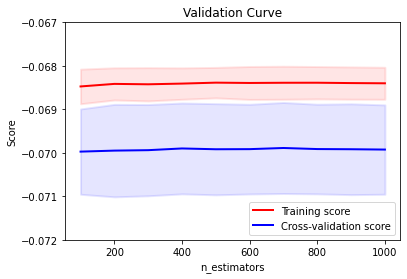

In [23]:
import Zillow.visualization as zv

zv.plot_grid_search_validation_curve(gscv, 'n_estimators', ylim=(-.072,-.067))

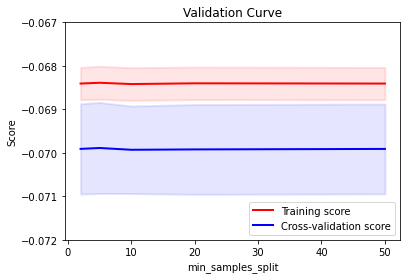

In [22]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_split', ylim=(-.072,-.067))

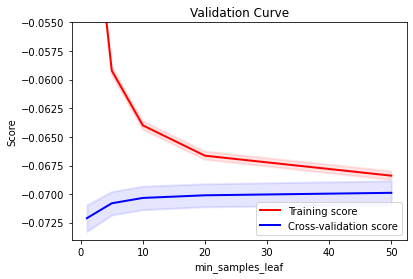

In [15]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.074,-.055))

It seems that varying the number of trees and the minimum number of samples per node has little impact on the performance of the model, while it seems that increasing the number of samples per leaf leads to a convergence.

At this point it might be worth studying further what happens when the most significant parameter changes. The parameters used will be the optimal ones identified by the previous `gridsearchCV`.

In [127]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randf = RandomForestRegressor()

params = {
    'n_estimators': [700],
    'max_features': ['log2'],
    'min_samples_split': [5],
    'min_samples_leaf': [x for x in range(10, 1001, 10)],
}

gscv = GridSearchCV(estimator = randf, 
                         return_train_score=True,
                         param_grid=params,
                         cv = 4,
                         scoring='neg_mean_absolute_error',
                         verbose=1,
                         n_jobs = -1)

gscv.fit(X_small, y_small)
gscv.best_params_, gscv.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits
CPU times: user 5.59 s, sys: 96.3 ms, total: 5.69 s
Wall time: 4min 20s


({'max_features': 'log2',
  'min_samples_leaf': 310,
  'min_samples_split': 5,
  'n_estimators': 700},
 -0.06976834930619988)

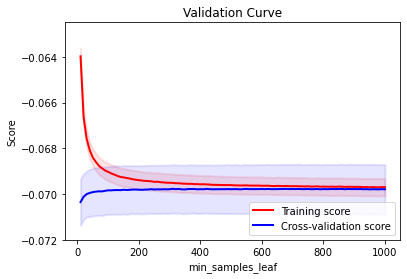

In [128]:
zv.plot_grid_search_validation_curve(gscv, 'min_samples_leaf', ylim=(-.072,-.0625))

As the number of samples per leaf increases, the validation set error decreases

In [3]:
rf = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           max_depth=30,
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_validation)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07059
 Mean squared error: 0.02984
           R2 score: 0.00714


## Feature selection

Thanks to the random forest we also have the possibility to obtain the evaluation of the features most used by the trees, and therefore determine their importance, if there are related or completely unused columns we can evaluate to remove them.

In [4]:
rf.feature_importances_

array([3.57075411e-02, 3.67449465e-02, 9.74368673e-02, 1.00319924e-01,
       3.01771830e-03, 5.41384017e-02, 5.53631358e-02, 4.73454288e-02,
       6.68259949e-03, 5.82287782e-02, 4.73219640e-03, 8.20715304e-02,
       7.78171294e-02, 6.65232581e-02, 1.26541728e-01, 5.52745245e-03,
       6.99663331e-03, 2.24321186e-02, 2.88453327e-02, 1.67234335e-02,
       1.50475512e-04, 5.82556667e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.56835843e-03, 1.20654503e-04,
       1.14616117e-02, 1.31434554e-03, 2.79121593e-05, 2.73460728e-03,
       3.76607453e-05, 2.37939223e-04, 5.89887060e-03, 2.28450160e-03,
       0.00000000e+00, 1.03871374e-04, 3.00507660e-03, 3.31149279e-03,
       4.35222362e-03, 0.00000000e+00, 0.00000000e+00, 4.82593408e-03,
       0.00000000e+00, 1.27473255e-03, 0.00000000e+00, 0.00000000e+00,
       3.19735070e-04, 2.93249912e-04, 0.00000000e+00, 6.69885844e-03,
       0.00000000e+00, 2.33280566e-04, 3.42369781e-03, 1.52606140e-03,
      

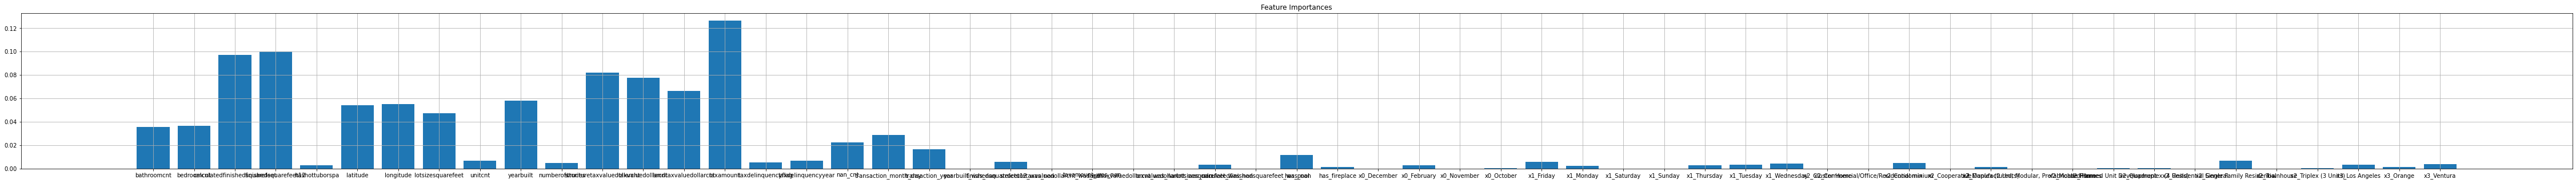

In [5]:
from Zillow.visualization import plot_random_forest_feature_importance

plot_random_forest_feature_importance(X_train, rf)

As you can see from the graph, many of the features that have been added are completely unused

In [127]:
%%time
from sklearn.model_selection import cross_val_score
import numpy as np

best_features = np.argsort(rf.feature_importances_)[::-1]

rmae = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=700,
                                     min_samples_split=5,
                                     min_samples_leaf=310,
                                     max_features='log2',
                                     random_state=42)
    scores = cross_val_score(rf_small, 
                             X_small.iloc[:,best_features[:f]], y_small, 
                             cv=4, scoring='neg_mean_absolute_error', n_jobs=-1)
    rmae += [-scores.mean()]
    
print ("Full score:", rmae[-1])
print ("Best score:", min(rmae))

Full score: 0.069911378895871
Best score: 0.06990763237795906
CPU times: user 1.52 s, sys: 424 ms, total: 1.95 s
Wall time: 12min


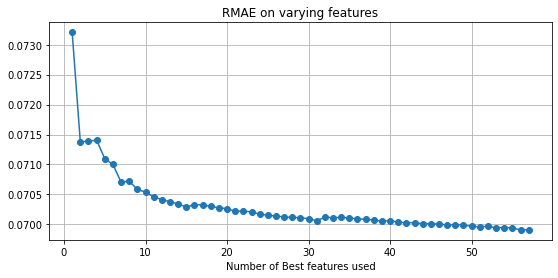

In [128]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(best_features)+1), rmae, 'o-', label="RMAE")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();

From a quick heuristic it can be seen that after the 30 features, each addition has a minimal influence on the improvement of the model, but the best point is using all the features available. However it can be seen from the vector `rf.feature_importances_` that some parameters have influence equal to 0.

In [139]:
# features woth 0.0 influence in random forest
np.array(feature_names)[np.argsort(rf.feature_importances_)[::-1][-sum(rf.feature_importances_ == 0):]]

array(['x2_Cooperative', 'x2_Commercial/Office/Residential mix',
       'x2_Manufactured, Modular, Prefabricated Homes', 'x2_Mobile Home',
       'x1_Saturday', 'x2_Cluster Home',
       'structuretaxvaluedollarcnt_was_nan', 'x2_Residential General',
       'taxamount_was_nan', 'landtaxvaluedollarcnt_was_nan',
       'x2_Townhouse', 'taxvaluedollarcnt_was_nan'], dtype='<U45')

In [140]:
%%time
from sklearn.feature_selection import RFECV

rf_small = RandomForestRegressor(n_estimators=700,
                                 min_samples_split=5,
                                 min_samples_leaf=310,
                                 max_features='log2',
                                 random_state=42)
selector = RFECV(rf_small,
                 step=1,
                 cv=4,
                 scoring='neg_mean_absolute_error',
                 min_features_to_select=5,
                 verbose=1,
                 n_jobs=-1)
selector.fit(X_small,y_small);

CPU times: user 10.3 s, sys: 108 ms, total: 10.4 s
Wall time: 5min 47s


RFECV(cv=4,
      estimator=RandomForestRegressor(max_features='log2', min_samples_leaf=310,
                                      min_samples_split=5, n_estimators=700,
                                      random_state=42),
      min_features_to_select=5, n_jobs=-1, scoring='neg_mean_absolute_error',
      verbose=1)

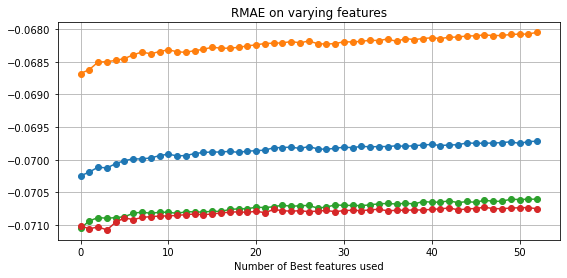

In [145]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot( selector.grid_scores_, 'o-', label="cross validation score")
ax.set_title("RMAE on varying features")
ax.set_xlabel("Number of Best features used")
ax.grid();

In [146]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
selector.fit(X_train, y_train)

y_pred = selector.predict(X_validation)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07059
 Mean squared error: 0.02984
           R2 score: 0.00714


As you can see from the graphs from the thirtieth feature onwards, the contribution of each variable is very small, the recursive feature eliminator however indicates that the best model is the one that takes into account all the variables.

However, checking the correlation matrix some features seem to be strongly correlated with each other:

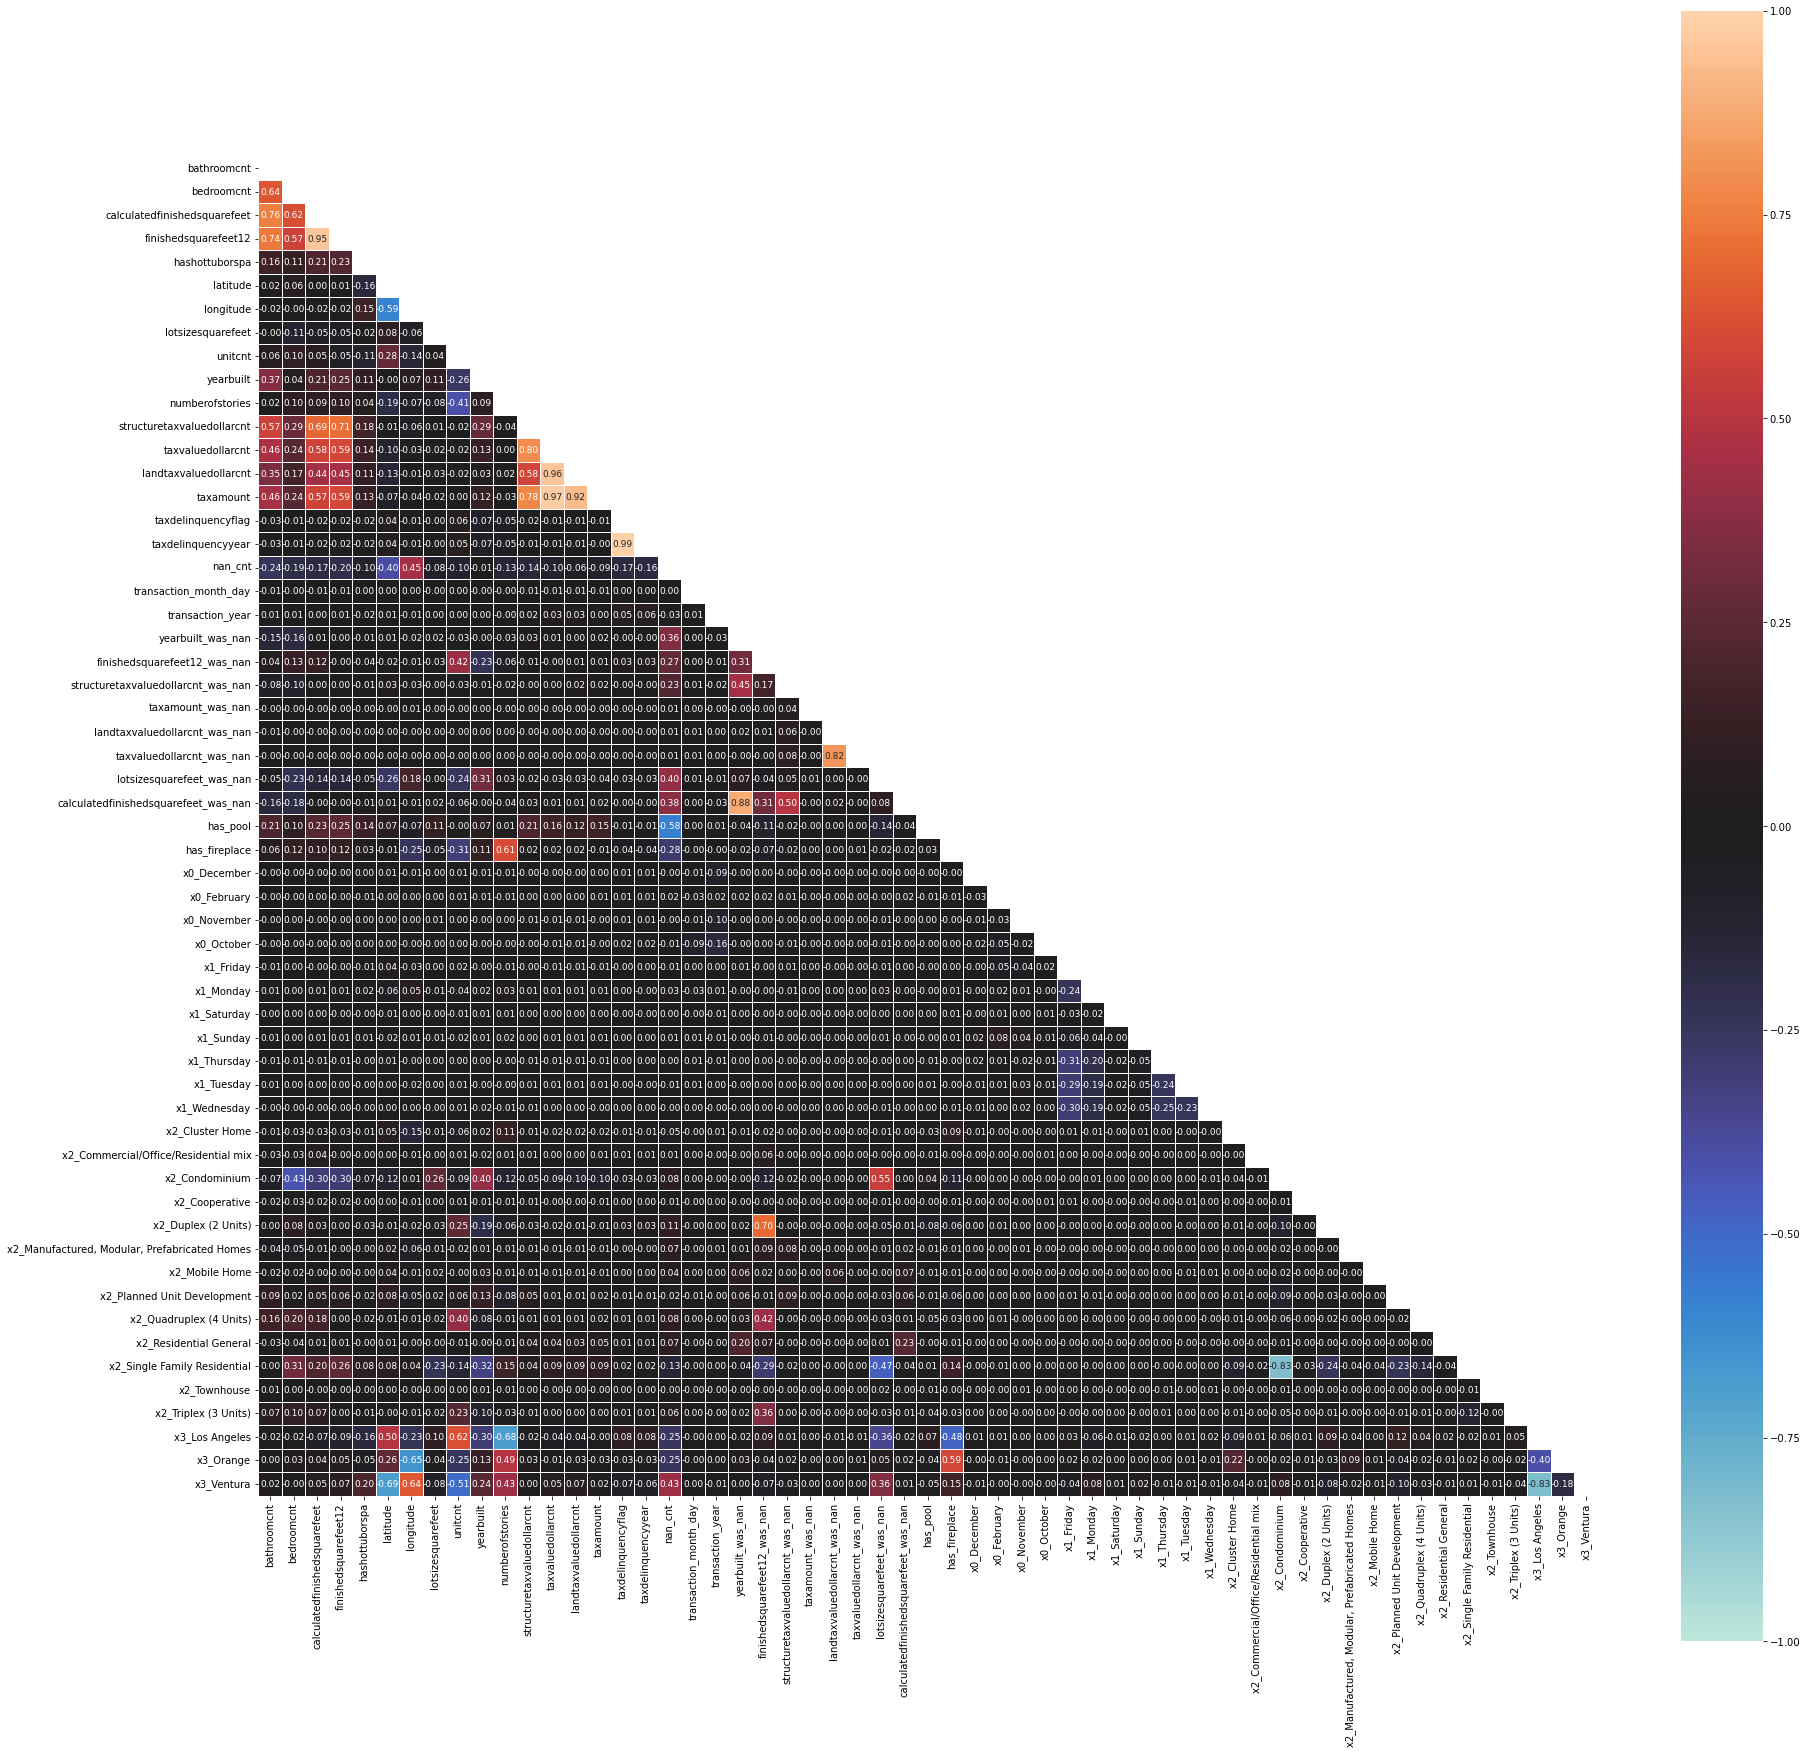

In [6]:
from Zillow.visualization import plot_heatmap

plot_heatmap(X_train)

In [46]:
from pprint import pprint
threshold = 0.90

corr = X_train.corr()

for r in corr.columns:
    for c in corr.columns:
        if abs(corr.loc[r, c]) >= threshold and corr.columns.get_loc(r) > corr.columns.get_loc(
                c):  # check also to take only values under the main diagonal (to avoid repetitions)
            pprint({'col1':r, 'col2':c, 'corr':corr.loc[r, c]})


{'col1': 'finishedsquarefeet12',
 'col2': 'calculatedfinishedsquarefeet',
 'corr': 0.9535139146654592}
{'col1': 'landtaxvaluedollarcnt',
 'col2': 'taxvaluedollarcnt',
 'corr': 0.9566946884218183}
{'col1': 'taxamount', 'col2': 'taxvaluedollarcnt', 'corr': 0.9689698681913027}
{'col1': 'taxamount',
 'col2': 'landtaxvaluedollarcnt',
 'corr': 0.9229993386067722}
{'col1': 'taxdelinquencyyear',
 'col2': 'taxdelinquencyflag',
 'corr': 0.9860870751415667}


In particular, `finishedsquarefeet12` and` calculatedfinishedsquarefeet`, two of the most important features calculated by RandomForest have a correlation index of 0.95.
Furthermore, `taxamount` is strongly correlated with` landtaxvaluedollarcnt` and `taxvaluedollarcnt` (also related to each other), and these are other features rated as highly important by RandomForest.

Such a strong correlation indicates that the variables contain substantially the same information and one of them is enough to explain the information, so I remove those that originally had less missing data (also remove `taxamount_was_nan`,` landtaxvaluedollarcnt_was_nan`, `finishedsquarefeet12_was_nan`)

Instead `taxdelinquencyyear` and` taxdelinquencyflag` are strongly correlated as `taxdelinquencyyear` implicitly contains the flag information, i.e. if no taxes have been paid for a certain number of years, then the information can be deduced if they have been paid or less taxes. In this case the richest information will be held (`taxdelinquencyyear`).

In [7]:
drop_list = [
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag'
]

X_train_light = X_train.drop(drop_list, axis=1)
X_valid_light = X_validation.drop(drop_list, axis=1)

In [8]:
feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_light, y_train)

y_pred = feature_selector.predict(X_valid_light)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07066
 Mean squared error: 0.02990
           R2 score: 0.00532


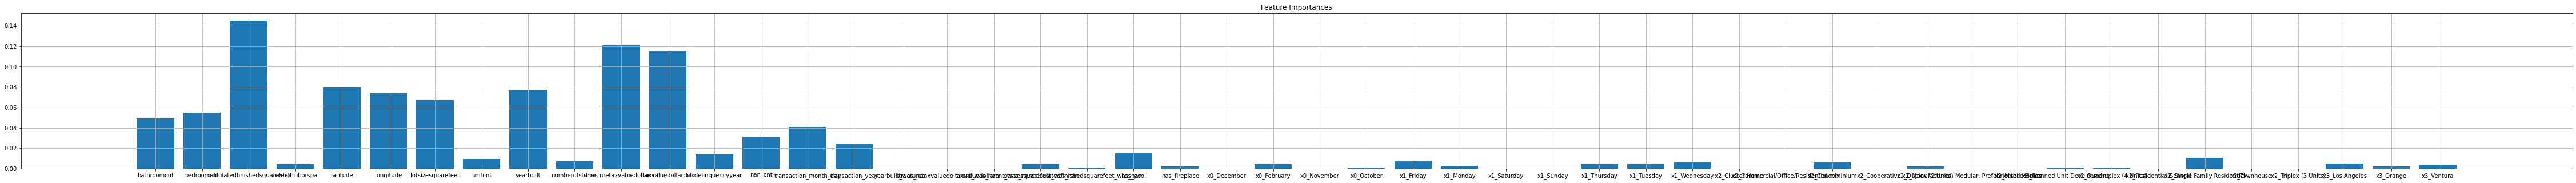

In [9]:
plot_random_forest_feature_importance(X_train_light, feature_selector)

Si osserva dal grafico che ora le colonne rimaste hanno acquisito maggiore importanza nella random forest.

Inoltre molte delle feature aggiunte hanno una bassa importanza nella creazione di split tra i nodi della random forest, in particolare 7 di queste non sono di alcuna utilità:

In [12]:
# features woth 0.0 influence in random forest
feature_names = X_train_light.columns.to_list()
np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]

array(['x2_Townhouse', 'x2_Residential General',
       'taxvaluedollarcnt_was_nan', 'x2_Mobile Home',
       'x2_Manufactured, Modular, Prefabricated Homes',
       'structuretaxvaluedollarcnt_was_nan', 'x2_Cooperative',
       'x1_Saturday', 'x2_Commercial/Office/Residential mix'],
      dtype='<U45')

In [13]:
least_important_features = np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_light = X_train_light.drop(least_important_features, axis=1)
X_valid_light = X_valid_light.drop(least_important_features, axis=1)

In [14]:
feature_selector.fit(X_train_light, y_train)

y_pred = feature_selector.predict(X_valid_light)

print_measure(y_true=y_validation, y_pred=y_pred)

Mean absolute error: 0.07067
 Mean squared error: 0.02988
           R2 score: 0.00583


Anyway we see that we obtain the best score making predictions with all features

## Random forest and feature evaluation by county

Assuming that the best parameters for the random forest are those found by the general cross validation, we proceed to the analysis by county

In [16]:
import Zillow.data as zd
from Zillow.transform import ZillowTransformer, ZillowEncoder
from Zillow.types import County, Features as ft

import warnings
warnings.filterwarnings("ignore")

o_train, o_validation, o_test = zd.get_preprocessed_data(County.ORANGE)

v_train, v_validation, v_test = zd.get_preprocessed_data(County.VENTURA)

la_train, la_validation, la_test = zd.get_preprocessed_data(County.LOS_ANGELES)

## Orange

Firstly we make predictions with the whole data

In [17]:
from Zillow.metrics import measure_model

X_train_o, y_train_o = zd.split_x_y(o_train)
X_test_o, y_test_o = zd.split_x_y(o_validation)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_o, y_train_o)

y_pred = feature_selector.predict(X_test_o)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.06159
 Mean squared error: 0.02393
           R2 score: 0.00393


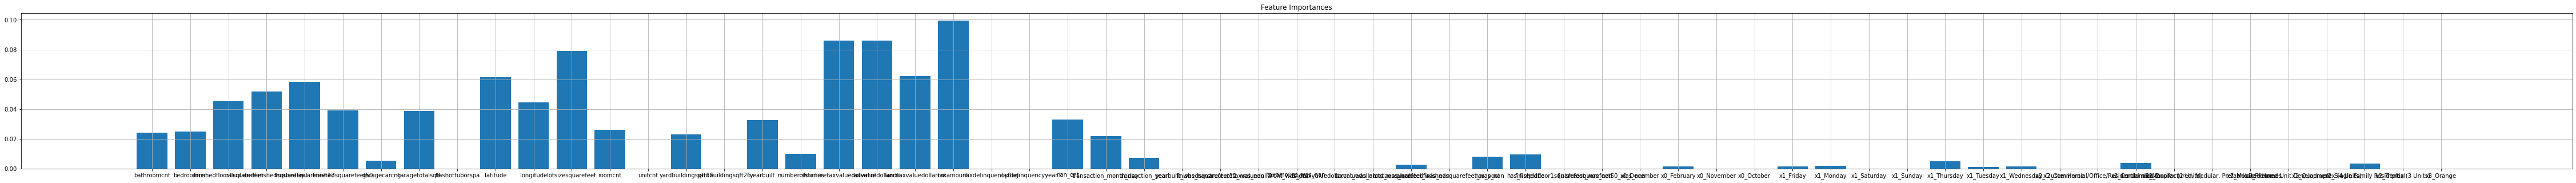

In [18]:
plot_random_forest_feature_importance(X_train_o, feature_selector)

### Remove 0 impact columns

Here we see the features importance given by a random forest for the county of Orange, there are many zero-importance features

In [19]:
feature_names = X_train_o.columns.to_list()
np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0.00):]]

array(['unitcnt', 'hashottuborspa', 'yardbuildingsqft26',
       'taxdelinquencyflag', 'x3_Orange', 'taxdelinquencyyear',
       'x0_October', 'x2_Quadruplex (4 Units)',
       'x2_Planned Unit Development', 'x2_Mobile Home',
       'x2_Manufactured, Modular, Prefabricated Homes',
       'x2_Duplex (2 Units)', 'x2_Commercial/Office/Residential mix',
       'x2_Cluster Home', 'x1_Sunday', 'x1_Saturday', 'x0_November',
       'yearbuilt_was_nan', 'x0_December', 'finishedsquarefeet50_was_nan',
       'finishedfloor1squarefeet_was_nan',
       'calculatedfinishedsquarefeet_was_nan',
       'taxvaluedollarcnt_was_nan', 'landtaxvaluedollarcnt_was_nan',
       'x2_Triplex (3 Units)', 'structuretaxvaluedollarcnt_was_nan',
       'finishedsquarefeet12_was_nan', 'taxamount_was_nan'], dtype='<U45')

In [20]:
least_important_features =np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_o = X_train_o.drop(least_important_features, axis=1)
X_test_o = X_test_o.drop(least_important_features, axis=1)

In [21]:
feature_selector.fit(X_train_o, y_train_o)

y_pred = feature_selector.predict(X_test_o)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.06171
 Mean squared error: 0.02393
           R2 score: 0.00373


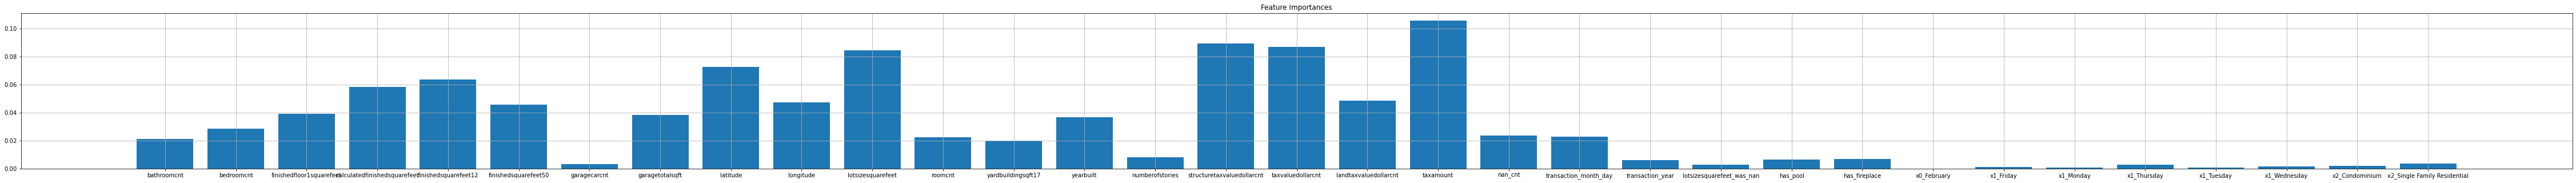

In [22]:
plot_random_forest_feature_importance(X_train_o, feature_selector)

### Remove correlated features

In the same way as before we see that there is correlation $> 90\%$ between some columns

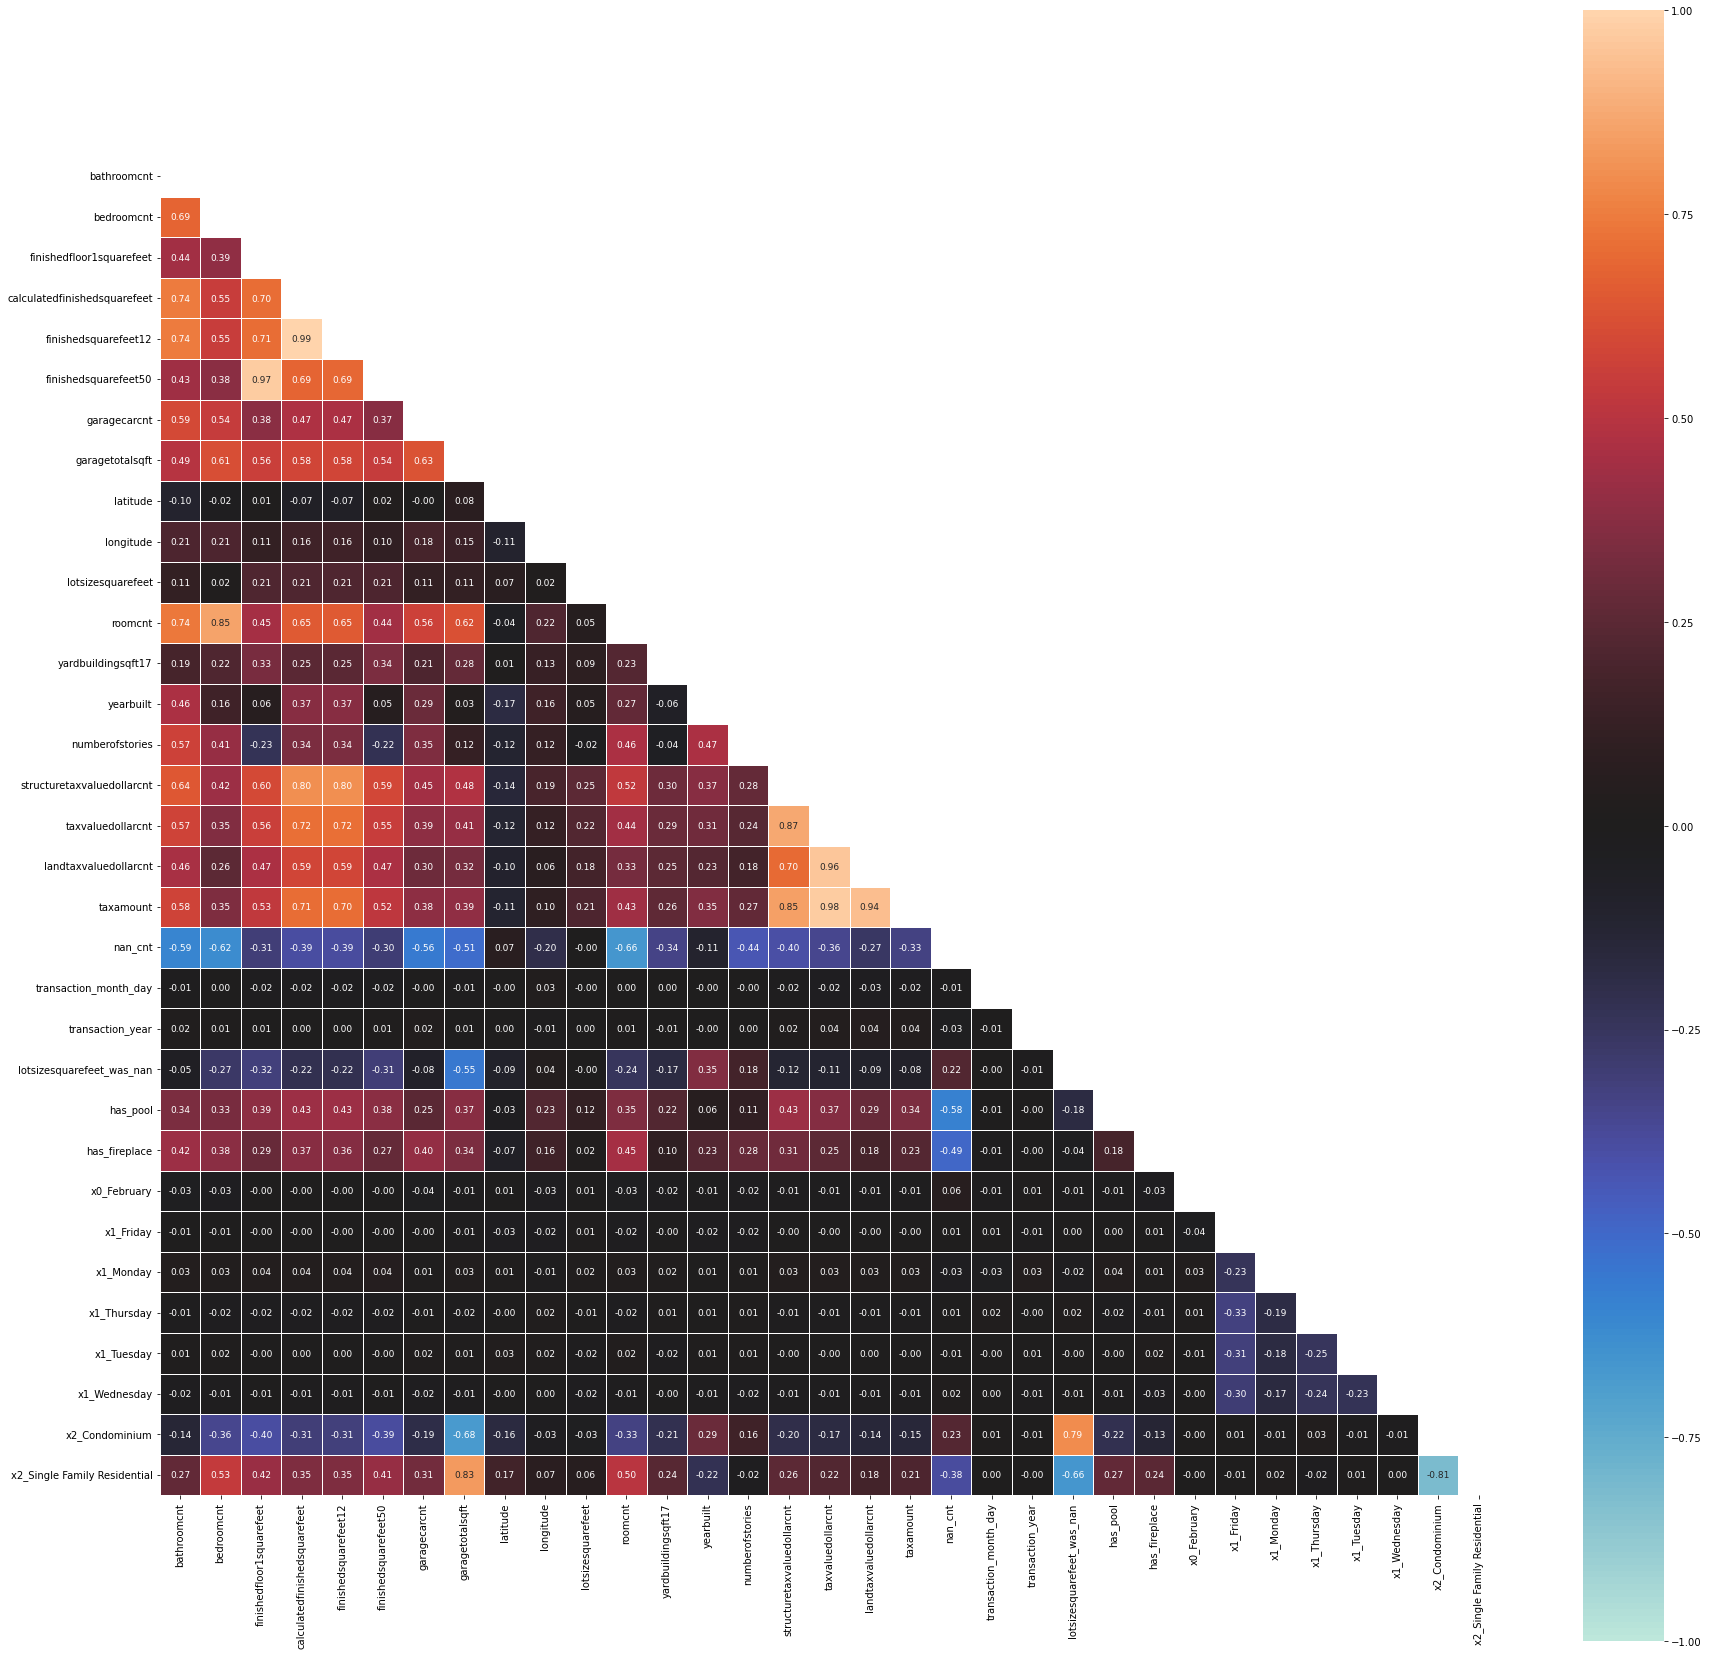

In [23]:
plot_heatmap(X_train_o)

In [26]:
corr = X_train_o.corr()

for r in corr.columns:
    for c in corr.columns:
        if abs(corr.loc[r, c]) >= threshold and corr.columns.get_loc(r) > corr.columns.get_loc(
                c):  # check also to take only values under the main diagonal (to avoid repetitions)
            pprint({'col1':r, 'col2':c, 'corr':corr.loc[r, c]})


{'col1': 'finishedsquarefeet12',
 'col2': 'calculatedfinishedsquarefeet',
 'corr': 0.9949163059023711}
{'col1': 'finishedsquarefeet50',
 'col2': 'finishedfloor1squarefeet',
 'corr': 0.9717588723391976}
{'col1': 'landtaxvaluedollarcnt',
 'col2': 'taxvaluedollarcnt',
 'corr': 0.9580244263468171}
{'col1': 'taxamount', 'col2': 'taxvaluedollarcnt', 'corr': 0.9758293024818506}
{'col1': 'taxamount',
 'col2': 'landtaxvaluedollarcnt',
 'corr': 0.9356802305510838}


In [27]:
drop_list = [
    'finishedsquarefeet12',
    'finishedfloor1squarefeet',   
    'taxamount',
    'landtaxvaluedollarcnt',
]

X_train_o_light = X_train_o.drop(drop_list, axis=1)
X_test_o_light = X_test_o.drop(drop_list, axis=1)

Removing the correlated features we get a better result than just dropping unuseful columns

In [28]:
feature_selector.fit(X_train_o_light, y_train_o)

y_pred = feature_selector.predict(X_test_o_light)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.06165
 Mean squared error: 0.02391
           R2 score: 0.00441


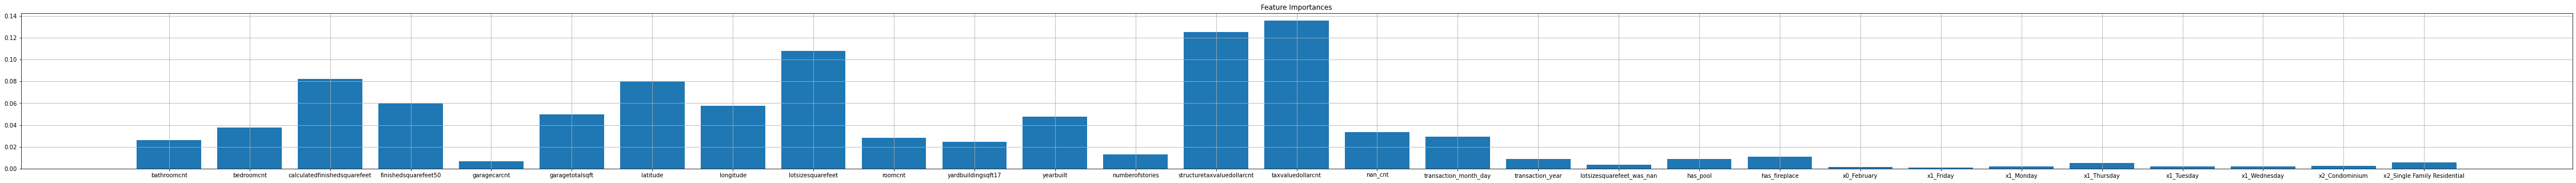

In [29]:
plot_random_forest_feature_importance(X_train_o_light, feature_selector)

## Ventura

In [30]:
X_train_v, y_train_v = zd.split_x_y(v_train)
X_test_v, y_test_v = zd.split_x_y(v_validation)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_v, y_train_v)

y_pred = feature_selector.predict(X_test_v)

print_measure(y_true=y_test_v, y_pred=y_pred)

Mean absolute error: 0.06059
 Mean squared error: 0.02925
           R2 score: 0.00607


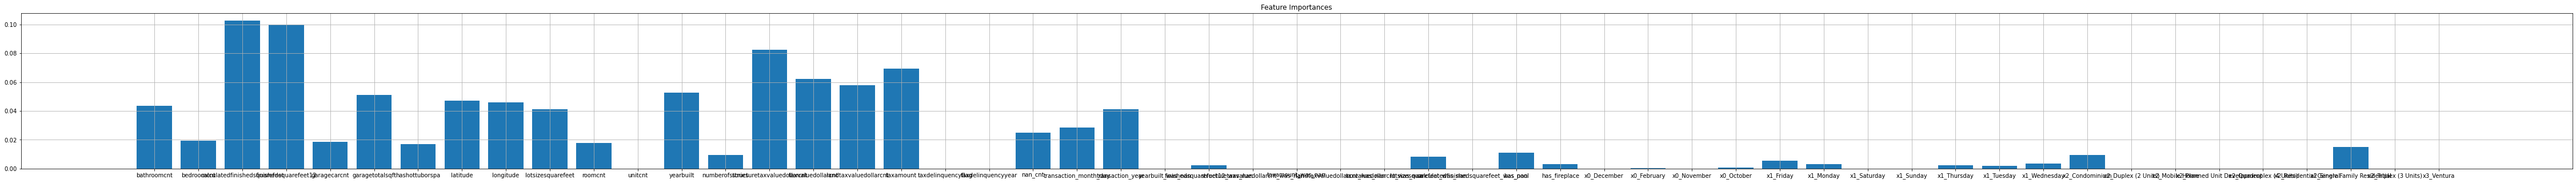

In [31]:
plot_random_forest_feature_importance(X_train_v, feature_selector)

### Remove zero impact columns

In [32]:
feature_names = X_train_v.columns.to_list()
least_important_features =np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_v = X_train_v.drop(least_important_features, axis=1)
X_test_v = X_test_v.drop(least_important_features, axis=1)

In [33]:
feature_selector.fit(X_train_v, y_train_v)

y_pred = feature_selector.predict(X_test_v)

print_measure(y_true=y_test_v, y_pred=y_pred)

Mean absolute error: 0.06060
 Mean squared error: 0.02924
           R2 score: 0.00663


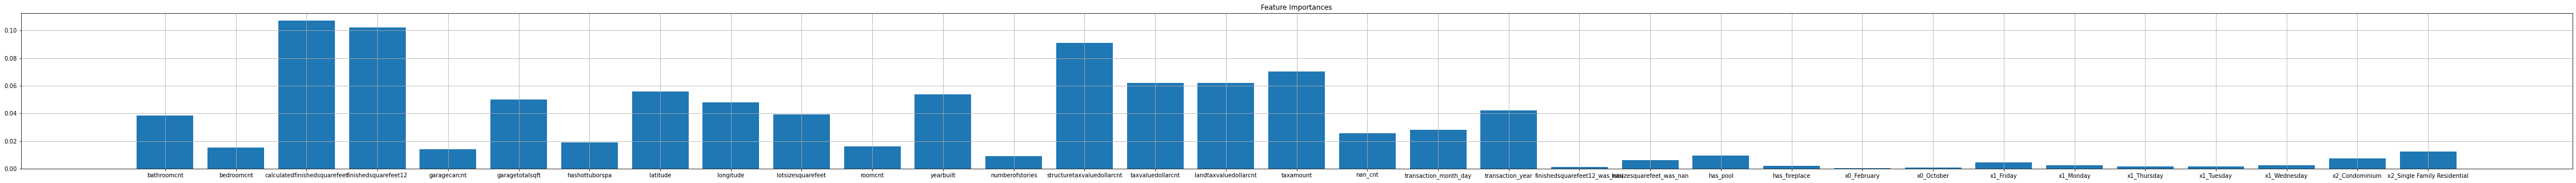

In [34]:
plot_random_forest_feature_importance(X_train_v, feature_selector)

### Remove correlated features

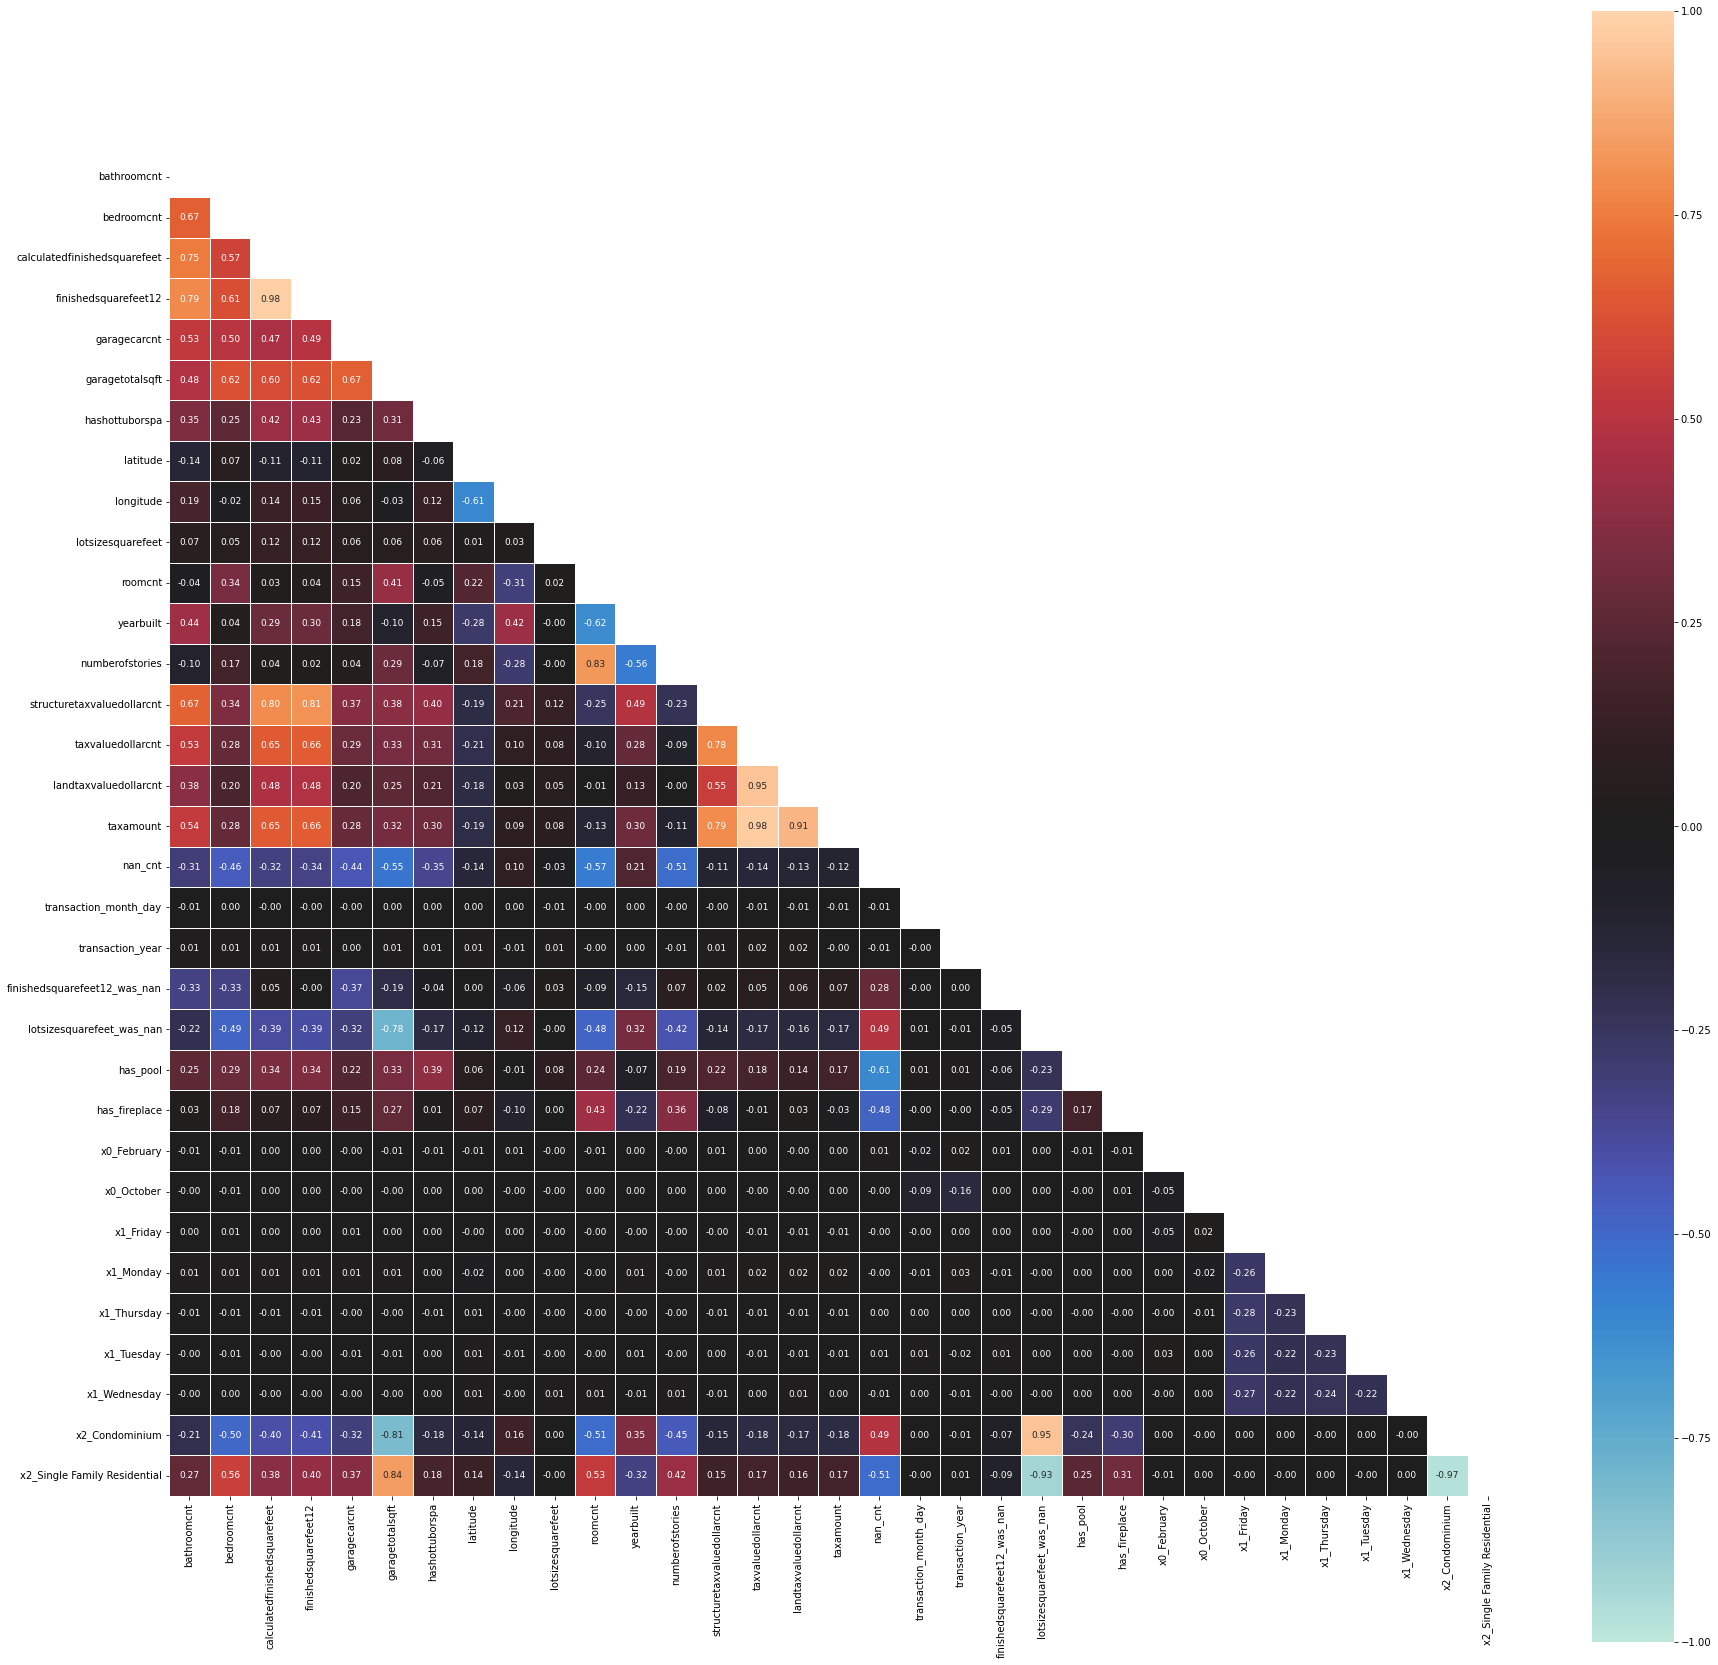

In [35]:
plot_heatmap(X_train_v);

In this case we see also some spurious correlations that come to the surface (i.e. `x2_Condominium` and `lotsizesquarefeet_was_nan` have a correlation of $95\%$ )

In [36]:
corr = X_train_v.corr()

for r in corr.columns:
    for c in corr.columns:
        if abs(corr.loc[r, c]) >= threshold and corr.columns.get_loc(r) > corr.columns.get_loc(
                c):  # check also to take only values under the main diagonal (to avoid repetitions)
            pprint({'col1':r, 'col2':c, 'corr':corr.loc[r, c]})


{'col1': 'finishedsquarefeet12',
 'col2': 'calculatedfinishedsquarefeet',
 'corr': 0.9807184399295257}
{'col1': 'landtaxvaluedollarcnt',
 'col2': 'taxvaluedollarcnt',
 'corr': 0.9501437129972533}
{'col1': 'taxamount', 'col2': 'taxvaluedollarcnt', 'corr': 0.975500839717753}
{'col1': 'taxamount',
 'col2': 'landtaxvaluedollarcnt',
 'corr': 0.9132846376297766}
{'col1': 'x2_Condominium',
 'col2': 'lotsizesquarefeet_was_nan',
 'corr': 0.9496098965691462}
{'col1': 'x2_Single Family Residential',
 'col2': 'lotsizesquarefeet_was_nan',
 'corr': -0.9251872263616032}
{'col1': 'x2_Single Family Residential',
 'col2': 'x2_Condominium',
 'corr': -0.9733888248934961}


In [37]:
# we drop only not spurious correlations
drop_list = [
    'finishedsquarefeet12',   
    'taxamount',
    'landtaxvaluedollarcnt',
]

X_train_v_light = X_train_v.drop(drop_list, axis=1)
X_test_v_light = X_test_v.drop(drop_list, axis=1)

In [38]:
feature_selector.fit(X_train_v_light, y_train_v)

y_pred = feature_selector.predict(X_test_v_light)

print_measure(y_true=y_test_v, y_pred=y_pred)

Mean absolute error: 0.06065
 Mean squared error: 0.02925
           R2 score: 0.00610


## Los Angeles

In [39]:
X_train_la, y_train_la = zd.split_x_y(la_train)
X_test_la, y_test_la = zd.split_x_y(la_validation)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=310,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_la, y_train_la)

y_pred = feature_selector.predict(X_test_la)

print_measure(y_true=y_test_la, y_pred=y_pred)

Mean absolute error: 0.07589
 Mean squared error: 0.03085
           R2 score: 0.00715


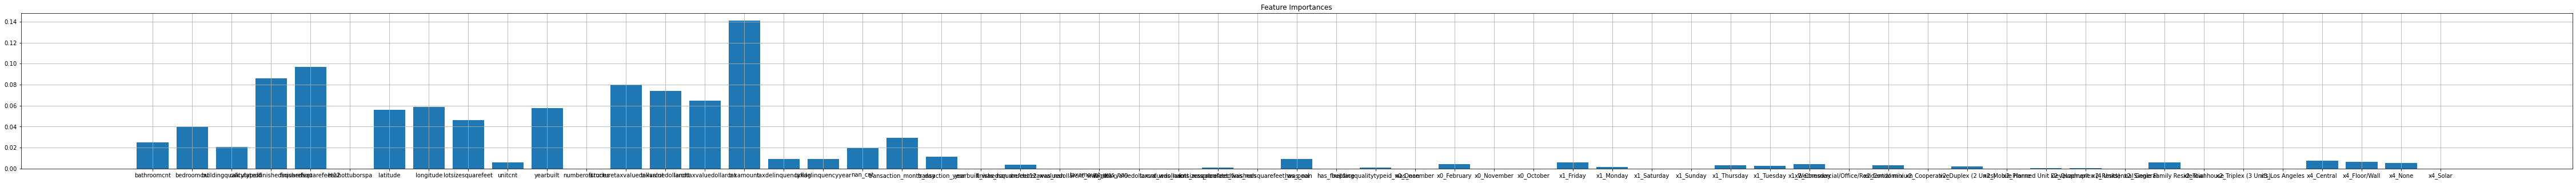

In [40]:
plot_random_forest_feature_importance(X_train_la, feature_selector)

### Remove 0 impact columns

In [41]:
feature_names = X_train_la.columns.to_list()
least_important_features =np.array(feature_names)[np.argsort(feature_selector.feature_importances_)[::-1][-sum(feature_selector.feature_importances_ == 0):]]
X_train_la = X_train_la.drop(least_important_features, axis=1)
X_test_la = X_test_la.drop(least_important_features, axis=1)

feature_selector.fit(X_train_la, y_train_la)

y_pred = feature_selector.predict(X_test_la)

print_measure(y_true=y_test_la, y_pred=y_pred)

Mean absolute error: 0.07589
 Mean squared error: 0.03081
           R2 score: 0.00857


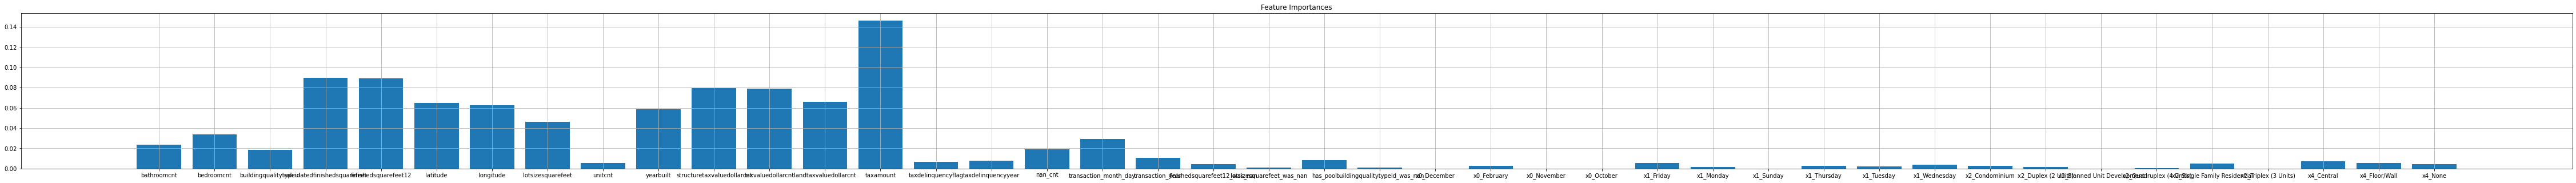

In [42]:
plot_random_forest_feature_importance(X_train_la, feature_selector)

### Remove correlated features

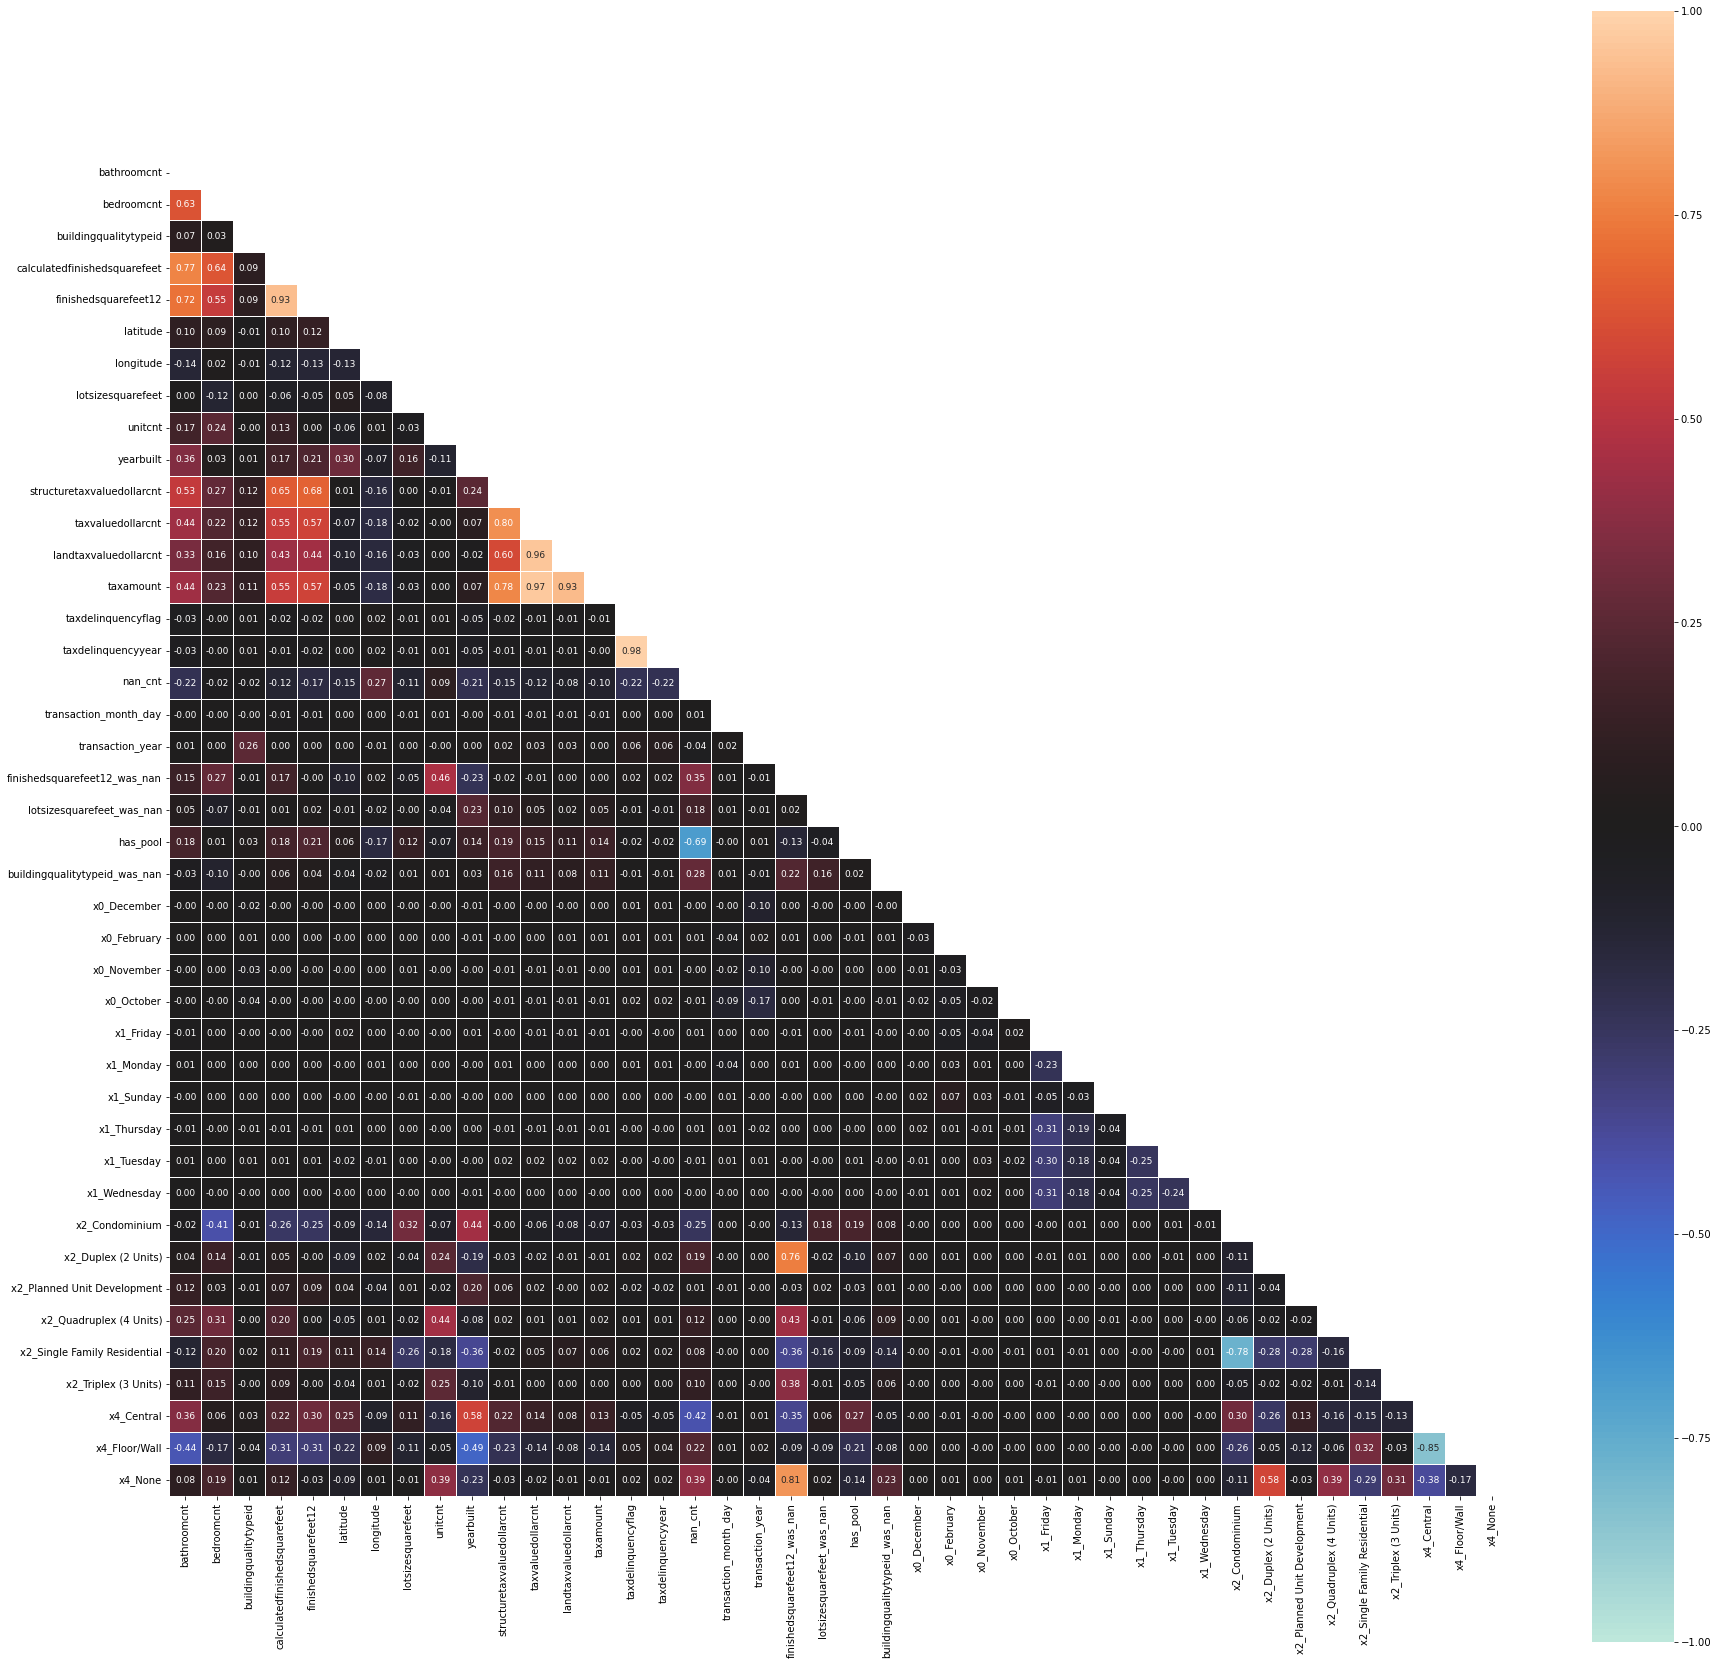

In [43]:
plot_heatmap(X_train_la);

In [44]:
corr = X_train_la.corr()

for r in corr.columns:
    for c in corr.columns:
        if abs(corr.loc[r, c]) >= threshold and corr.columns.get_loc(r) > corr.columns.get_loc(
                c):  # check also to take only values under the main diagonal (to avoid repetitions)
            pprint({'col1':r, 'col2':c, 'corr':corr.loc[r, c]})

{'col1': 'finishedsquarefeet12',
 'col2': 'calculatedfinishedsquarefeet',
 'corr': 0.934083165928874}
{'col1': 'landtaxvaluedollarcnt',
 'col2': 'taxvaluedollarcnt',
 'corr': 0.9588231228282144}
{'col1': 'taxamount', 'col2': 'taxvaluedollarcnt', 'corr': 0.9685946141343373}
{'col1': 'taxamount',
 'col2': 'landtaxvaluedollarcnt',
 'corr': 0.9267271091010988}
{'col1': 'taxdelinquencyyear',
 'col2': 'taxdelinquencyflag',
 'corr': 0.9846502301471701}


In [45]:
drop_list = [
    'finishedsquarefeet12',   
    'taxamount',
    'landtaxvaluedollarcnt',
    'taxdelinquencyflag'
]

X_train_la_light = X_train_la.drop(drop_list, axis=1)
X_test_la_light = X_test_la.drop(drop_list, axis=1)

In [46]:
feature_selector.fit(X_train_la_light, y_train_la)

y_pred = feature_selector.predict(X_test_la_light)

print_measure(y_true=y_test_la, y_pred=y_pred)

Mean absolute error: 0.07598
 Mean squared error: 0.03090
           R2 score: 0.00568


## Summary

Predictions below will be made on the entire dataset and by county, using the best combination of features for each model

In [48]:
from Zillow.metrics import measure_model
import pandas as pd

scores = []
tag = ['All', 'Orange', 'Ventura', 'LA']

train, validation, test = zd.get_preprocessed_data()
X_train, y_train = zd.split_x_y( pd.concat([train, validation], axis=0) )
X_test, y_test = zd.split_x_y(test)

model = RandomForestRegressor(max_features='log2',
                              min_samples_leaf=310,
                              min_samples_split=5,
                              n_estimators=700,
                              random_state=42,
                              n_jobs=-1)
    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

scores.append(measure_model( y_true=y_test, y_pred=y_pred )[0])

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06960
 Mean squared error: 0.02841
           R2 score: 0.00709


The best model for Orange and Ventura was with all features

In [49]:
train, validation, test = zd.get_preprocessed_data(county=County.ORANGE)
X_train, y_train = zd.split_x_y( pd.concat([train, validation], axis=0) )
X_test, y_test = zd.split_x_y(test)
    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

scores.append(measure_model( y_true=y_test, y_pred=y_pred )[0])

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06213
 Mean squared error: 0.02405
           R2 score: 0.00088


In [50]:
train, validation, test = zd.get_preprocessed_data(county=County.VENTURA)
X_train, y_train = zd.split_x_y( pd.concat([train, validation], axis=0) )
X_test, y_test = zd.split_x_y(test)
    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

scores.append(measure_model( y_true=y_test, y_pred=y_pred )[0])

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06062
 Mean squared error: 0.02844
           R2 score: 0.00629


while for Los Angeles the best model is the one without 0 impact columns

In [51]:
train, validation, test = zd.get_preprocessed_data(county=County.LOS_ANGELES)
X_train, y_train = zd.split_x_y( pd.concat([train, validation], axis=0) )
X_test, y_test = zd.split_x_y(test)
    
model.fit(X_train, y_train)

feature_names = X_train.columns.to_list()
least_important_features =np.array(feature_names)[np.argsort(model.feature_importances_)[::-1][-sum(model.feature_importances_ == 0):]]

X_train = X_train.drop(least_important_features, axis=1)
X_test = X_test.drop(least_important_features, axis=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

scores.append(measure_model( y_true=y_test, y_pred=y_pred )[0])

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.07427
 Mean squared error: 0.02889
           R2 score: 0.00896


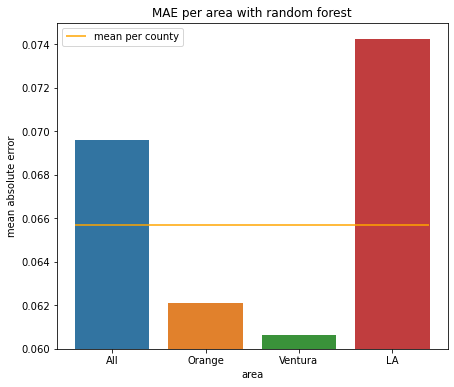

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 6))
data = pd.DataFrame({'score': scores, 'area': ['All', 'Orange', 'Ventura', 'LA']})
sns.barplot(data=data, x='area', y='score', ax=ax)
ax.set_ylim(0.060,0.075);
ax.set_ylabel('mean absolute error')
ax.hlines(np.mean(scores[1:4]), xmin=-0.4, xmax=3.39, colors='orange', label='mean per county');
ax.legend()
ax.set_title('MAE per area with random forest');

In [56]:
np.mean(scores[1:4])

0.06567353912313624

Overall this is the best prediction result